# Задание №13. Градиентный бустинг

## Введение

Построение композиции — важный подход в машинном обучении, который позволяет объединять большое количество слабых алгоритмов в один сильный. Данный подход широко используется на практике в самых разных задачах.

На лекциях был рассмотрен метод градиентного бустинга, который последовательно строит композицию алгоритмов, причем каждый следующий алгоритм выбирается так, чтобы исправлять ошибки уже имеющейся композиции. Обычно в качестве базовых алгоритмов используют деревья небольшой глубины, поскольку их достаточно легко строить, и при этом они дают нелинейные разделяющие поверхности.

Другой метод построения композиций — случайный лес. В нем, в отличие от градиентного бустинга, отдельные деревья строятся независимо и без каких-либо ограничений на глубину — дерево наращивается до тех пор, пока не покажет наилучшее качество на обучающей выборке.

В этом задании мы будем иметь дело с задачей классификации. В качестве функции потерь будем использовать log-loss:

\begin{equation*}
L(y,z) = -y  \log(z) - (1 - y) \log(1 - z)
\end{equation*}

Здесь через y обозначен истинный ответ, через z — прогноз алгоритма. Данная функция является дифференцируемой, и поэтому подходит для использования в градиентном бустинге. Также можно показать, что при ее использовании итоговый алгоритм будет приближать истинные вероятности классов.

# Реализация в sklearn

В пакете `scikit-learn` градиентный бустинг реализован в модуле `ensemble` в виде классов `GradientBoostingClassifier` и `GradientBoostingRegressor`. Основные параметры, которые будут интересовать нас: `n_estimators`, `learning_rate`. Иногда может быть полезен параметр `verbose` для отслеживания процесса обучения.

Чтобы была возможность оценить качество построенной композиции на каждой итерации, у класса есть метод `staged_decision_function`. Для заданной выборки он возвращает ответ на каждой итерации.

Помимо алгоритмов машинного обучения, в пакете `scikit-learn` представлено большое число различных инструментов. В этом задании будет предложено воспользоваться функцией `train_test_split` модуля `cross_validation`. С помощью нее можно разбивать выборки случайным образом. На вход можно передать несколько выборок (с условием, что они имеют одинаковое количество строк). Пусть, например, имеются данные `X` и `y`, где `X` — это признаковое описание объектов, `y` — целевое значение. Тогда следующий код будет удобен для разбиения этих данных на обучающее и тестовое множества:
```python
X_train, X_test, y_train, y_test =
    train_test_split(X, y, test_size=0.33, 
                                random_state=42)

```


Обратите внимание, что при фиксированном параметре `random_state` результат разбиения можно воспроизвести.

Метрика `log-loss` реализована в пакете `metrics`: `sklearn.metrics.log_loss`. Заметим, что данная метрика предназначена для классификаторов, выдающих оценку принадлежности классу, а не бинарные ответы. И градиентный бустинг, и случайный лес умеют строить такие прогнозы — для этого нужно использовать метод predict_proba:
```python
pred = clf.predict_proba(X_test)
```

Метод `predict_proba` возвращает матрицу, i-й столбец которой содержит оценки принадлежности i-му классу.

Для рисования кривых качества на обучении и контроле можно воспользоваться следующим кодом:
```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])
```


# Материалы
* [Подробнее о градиентном бустинге и особенностях его применения к деревьям](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture09-ensembles.pdf)

# Инструкция по выполнению
   
1. Загрузите выборку из файла [gbm-data.csv](https://d3c33hcgiwev3.cloudfront.net/_75fb7a1b6f3431b6217cdbcba2fd30b9_gbm-data.csv?Expires=1582502400&Signature=SJf0IRL3Tfy8sWwdIAX0VaPOoBigSaJJBRaMMgZsPw~YhYWwaccntaxkRjfj3~9MMio16PjwRfDK50iyGhAX04Xa7DZr88uw1bklRI7V~3pFVr5ozWtyDOtRJWN9-PP1oc~yQnUW-b1I5n07K8lXMkp4rRbs0CGlIot0vfBWrxs_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A) с помощью pandas и преобразуйте ее в массив numpy (параметр `values` у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию `train_test_split` с параметрами `test_size = 0.8` и `random_state = 241`.


In [1]:
import utils
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('gbm-data.csv')
X = data.drop('Activity', 1).values
y = data.Activity.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка `[1, 0.5, 0.3, 0.2, 0.1]` проделайте следующее:

* Используйте метод `staged_decision_function` для предсказания качества на обучающей и тестовой выборке на каждой итерации.
* Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле:
\begin{equation*}
1 / (1 + e^{−y_{pred}})
\end{equation*} ,где y_pred — предсказанное значение.
* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции `sklearn.metrics.log_loss`) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.


Start training GradientBoostingClassifier with lr=1

      Iter       Train Loss   Remaining Time 
         1           1.0645            1.19m
         2           1.0022            1.17m
         3           0.9531            1.18m
         4           0.9223            1.18m
         5           0.9046            1.18m
         6           0.8813            1.20m
         7           0.8542            1.21m
         8           0.8354            1.21m
         9           0.8191            1.20m
        10           0.7912            1.19m
        20           0.6385            1.15m
        30           0.5206            1.09m
        40           0.4343            1.03m
        50           0.3474           58.19s
        60           0.2836           55.39s
        70           0.2337           52.40s
        80           0.1889           49.40s
        90           0.1626           46.48s
       100           0.1410           43.54s
       200           0.0314           14.35s


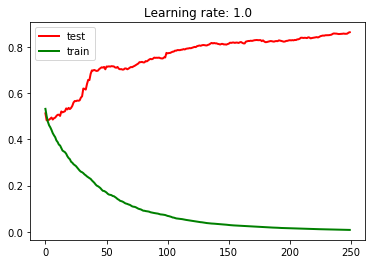

min-loss: 0.4825, iter: 1
Start training GradientBoostingClassifier with lr=0.5

      Iter       Train Loss   Remaining Time 
         1           1.1531            1.09m
         2           1.0659            1.07m
         3           1.0196            1.06m
         4           0.9857            1.07m
         5           0.9552            1.06m
         6           0.9331            1.06m
         7           0.9140            1.06m
         8           0.8951            1.06m
         9           0.8786            1.06m
        10           0.8592            1.06m
        20           0.7400            1.02m
        30           0.6416           58.13s
        40           0.5824           55.32s
        50           0.5084           52.41s
        60           0.4546           49.67s
        70           0.4194           47.01s
        80           0.3760           44.31s
        90           0.3323           41.83s
       100           0.2998           39.32s
       200        

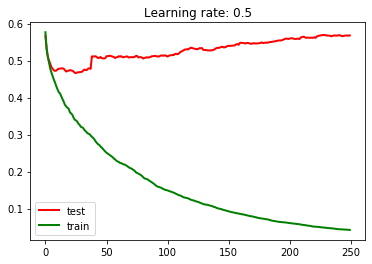

min-loss: 0.4661, iter: 25
Start training GradientBoostingClassifier with lr=0.3

      Iter       Train Loss   Remaining Time 
         1           1.2260            1.23m
         2           1.1379            1.25m
         3           1.0856            1.25m
         4           1.0514            1.25m
         5           1.0176            1.25m
         6           0.9938            1.23m
         7           0.9728            1.23m
         8           0.9579            1.22m
         9           0.9387            1.21m
        10           0.9240            1.21m
        20           0.8203            1.14m
        30           0.7472            1.08m
        40           0.6957            1.02m
        50           0.6447           57.87s
        60           0.5993           54.79s
        70           0.5559           51.85s
        80           0.5132           48.92s
        90           0.4746           45.79s
       100           0.4409           42.74s
       200       

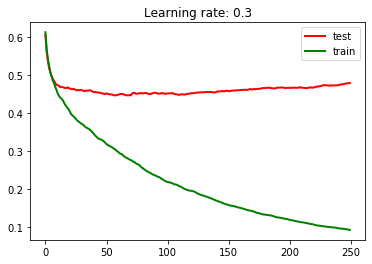

min-loss: 0.4468, iter: 68
Start training GradientBoostingClassifier with lr=0.2

      Iter       Train Loss   Remaining Time 
         1           1.2711            1.22m
         2           1.1985            1.23m
         3           1.1441            1.21m
         4           1.1056            1.21m
         5           1.0755            1.20m
         6           1.0546            1.20m
         7           1.0350            1.19m
         8           1.0165            1.18m
         9           1.0001            1.18m
        10           0.9873            1.17m
        20           0.8888            1.09m
        30           0.8270            1.03m
        40           0.7705           59.43s
        50           0.7303           56.78s
        60           0.6936           54.13s
        70           0.6622           51.21s
        80           0.6279           48.27s
        90           0.5990           45.34s
       100           0.5668           42.49s
       200       

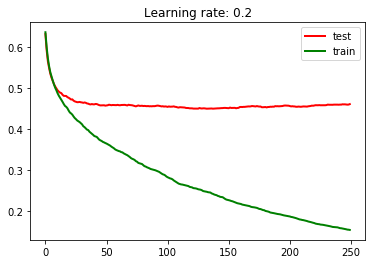

min-loss: 0.4490, iter: 132
Start training GradientBoostingClassifier with lr=0.1

      Iter       Train Loss   Remaining Time 
         1           1.3222            1.20m
         2           1.2754            1.17m
         3           1.2368            1.17m
         4           1.2024            1.16m
         5           1.1738            1.15m
         6           1.1497            1.14m
         7           1.1293            1.13m
         8           1.1107            1.12m
         9           1.0941            1.12m
        10           1.0797            1.11m
        20           0.9853            1.07m
        30           0.9296            1.02m
        40           0.8861           58.22s
        50           0.8550           55.67s
        60           0.8245           52.96s
        70           0.8000           50.19s
        80           0.7736           47.35s
        90           0.7519           44.58s
       100           0.7336           41.91s
       200      

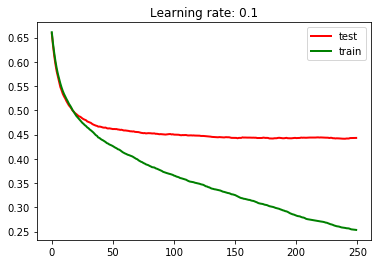

min-loss: 0.4413, iter: 239


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt

def sigm(Z):
        return 1 / (1 + np.exp(-Z))

train_loss = {}
test_loss = {}

for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    print(f'Start training GradientBoostingClassifier with lr={lr}\n')
    model = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=lr)
    model.fit(X_train, y_train)
    z_train = (sigm(z) for z in model.staged_decision_function(X_train))
    z_test = (sigm(z) for z in model.staged_decision_function(X_test))
    
    train_loss[lr] = [metrics.log_loss(y_train, z) for z in z_train]
    test_loss[lr] = [metrics.log_loss(y_test, z) for z in z_test]

    %matplotlib inline
    plt.plot(test_loss[lr], 'r', train_loss[lr], 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title(f'Learning rate: {lr:.1f}')
    plt.show()
    min_loss = np.min(test_loss[lr])
    min_loss_iter = np.argmin(test_loss[lr])
    print(f'min-loss: {min_loss:.4f}, iter: {min_loss_iter}')


3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

In [3]:
utils.answer('1', 'overfitting')

4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при `learning_rate = 0.2`.


In [6]:
min_loss = np.min(test_loss[0.2])
min_loss_iter = np.argmin(test_loss[0.2]) + 1
utils.answer('2', f'{min_loss:.2f} {min_loss_iter}')
print(f'min-loss: {min_loss:.2f}, iter: {min_loss_iter}')

min-loss: 0.45, iter: 133


5. На этих же данных обучите `RandomForestClassifier` с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c `random_state=241` и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции `predict_proba`. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=241, n_estimators=min_loss_iter)
model.fit(X_train, y_train)
z = model.predict_proba(X_test)
loss = metrics.log_loss(y_test, z)
utils.answer('3', f'{loss:.2f}')
loss

0.45107804032923543

Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.42. При необходимости округляйте дробную часть до двух знаков.

Обратите внимание, что, хотя в градиентного бустинге гораздо более слабые базовые алгоритмы, он выигрывает у случайного леса благодаря более "направленной" настройке — каждый следующий алгоритм исправляет ошибки имеющейся композиции. Также он обучается быстрее случайного леса благодаря использованию неглубоких деревьев. В то же время, случайный лес может показать более высокое качество при неограниченных ресурсах — так, он выиграет у градиентного бустинга на наших данных, если увеличить число деревьев до нескольких сотен (проверьте сами!).

Ответ на каждое задание — текстовый файл, содержащий ответ в первой строчке. Обратите внимание, что отправляемые файлы не должны содержать перевод строки в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над тем, чтобы убрать это ограничение.